In [1]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [2]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201118_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [3]:
import pandas as pd

In [4]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [5]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201118', 'main_result_sharebn.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
# if not exists(f_main_result):
if True:
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
            'multi_path': True,
            'multi_path_separate_bn': False,
    },
        generator=chain(
            explored_models_20201118_generator(with_source=True, separate_bn_list=[False]),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300


In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.352885   
                                                                                                  2560              0.525034   
                                                                                                  5120              0.576070   
                                                                                     cm-last      1280              0.390339   
                                                                                                  2560              0.557599   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560              0.325683   
                                                                                                  5120              0.346680   
                                                                                     cm-last      1280              0.315929   
                                                                                                  2560              0.337900   
                                                                                                  5120              0.334740   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       1280           0.169040   
                                                                                                  2560           0.245685   
                                                                                                  5120           0.265798   
                                                                                     cm-last      1280           0.186757   
                                                                                                  2560           0.259492   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560           0.151350   
                                                                                                  5120           0.161019   
                                                                                     cm-last      1280           0.147521   
                                                                                                  2560           0.156674   
                                                                                                  5120           0.155288   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       1280          0.372918   
                                                                                                  2560          0.470637   
                                                                                                  5120          0.497107   
                                                                                     cm-last      1280          0.400511   
                                                                           

In [7]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

In [8]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

In [10]:
from scipy.stats import pearsonr

1280
2560
5120


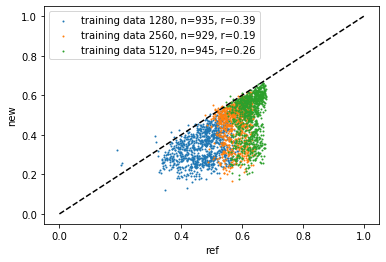

In [11]:
def plot_scatter():
    fig, ax = plt.subplots(squeeze=True);
    for train_keep in aaaa.index.get_level_values('train_keep').unique():
        b = aaaa.xs(train_keep, level='train_keep')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='training data {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
plot_scatter()

In [12]:
pearsonr(aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values)

(0.5904791524686398, 1.2028070425789847e-263)

In [13]:
df_main_result[df_main_result.isnull().any(axis=1)].index.get_level_values('rcnn_bl_cls').value_counts()
# high count models have OOM.

7     374
6     262
10    243
9     228
8     212
5     144
4      48
Name: rcnn_bl_cls, dtype: int64